In [51]:
%matplotlib inline
import pandas as pd
import random
import numpy as np
from random import sample
import seaborn as sns
from scipy import stats
sns.set(style='white', color_codes=True, font_scale=1.3)

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df_inmates = pd.read_csv('exinmates.csv')
df_inmates.head()

,Execution No.,TDCJ Number,First Name,Last Name,Date Received,Age Received,Date of Offense,Age at Offense,Execution Date,Execution Age,...,Education Level,Weight,Eye Color,Hair Color,Native State,Last Statement,Sentiment,More Info URL,Last Statement URL,Poverty Rate
0,545,999275,Ruben,Cardenas,07/29/1998,28.0,02/22/1997,26.0,11/09/2017,47,...,11.0,204.0,Brown,Black,Mexico,This is my statement:Â My final words.Â Firs...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,45.4
1,544,999411,Robert,Pruett,04/30/2002,22.0,12/17/1999,20.0,10/12/2017,38,...,8.0,160.0,Brown,Blonde,Texas,I just want to let everyone in here to know I ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,26.6
2,543,999494,Taichin,Preyor,03/30/2005,34.0,02/26/2004,33.0,7/27/2017,46,...,10.0,219.0,Brown,Black,Texas,"First and foremost I'd like to say, ""Justice h...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,21.6
3,542,997,James,Bigby,NaN,NaN,NaN,NaN,3/14/2017,61,...,NaN,NaN,NaN,NaN,NaN,"Yes, I do, Grace Kehler is that you? I have gi...",-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,12.3
4,541,999145,Rolando,Ruiz,NaN,NaN,NaN,NaN,3/07/2017,44,...,NaN,NaN,NaN,NaN,NaN,"Yes sir, I would first like to say to the Sanc...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,19.4


In [4]:
df_inmates['Age Received'].mean()

28.564935064935064

In [5]:
df_inmates['Age at Offense'].mean()

26.954545454545453

Most inmates on average enter death row approximately 2.5 years after their offense (quick turn around time).

In [6]:
df_inmates['Execution Age'].mean()

39.3394495412844

Most inmates on average stay on death row for approximately 11 years before being executed.

In [7]:
df_inmates['Gender'].value_counts()

Male      150
Female      3
male        1
Name: Gender, dtype: int64

Clearly, males outnumber females.

In [8]:
df_inmates['Race'].value_counts()

White       242
Black       198
Hispanic    103
Other         2
Name: Race, dtype: int64

A majority of inmates being White, with a close 2nd of Black.

In [9]:
df_inmates['Education Level'].max()

12.0

In [10]:
df_inmates['Education Level'].min()

3.0

In [11]:
df_inmates['Education Level'].mean()

9.876623376623376

The lowest being 3rd grade and the highest finishing high school, inmates average an education level of 9th grade.

In [12]:
df_inmates['Sentiment'].value_counts()

 1    200
 0    192
-1    153
Name: Sentiment, dtype: int64

A very close distribution between positive, negative, and neutral sentiments.  However, inmates are more positive at the time of their death.

In [13]:
df_inmates['Poverty Rate'].mean()

17.570458715596356

The average poverty county rate in Texas is 17.5%

In [48]:
temp = df_inmates.County.value_counts()
temp

Harris         126
Dallas          56
Bexar           44
Tarrant         40
Nueces          16
Jefferson       15
Montgomery      15
Lubbock         12
Smith           12
Brazos          12
Potter          10
Travis           8
Collin           7
McLennan         7
Galveston        6
Cameron          6
Hidalgo          6
Denton           6
Navarro          6
Taylor           5
Gregg            5
Fort Bend        5
Bowie            5
Anderson         4
Hunt             4
Brazoria         4
Randall          3
Bell             3
Williamson       3
Grayson          3
              ... 
Harrison         1
Trinity          1
Bastrop          1
Sabine           1
Crockett         1
Scurry           1
Houston          1
Morris           1
Aransas          1
Kleberg          1
Chambers         1
Atascosa         1
Kaufman          1
Caldwell         1
Bailey           1
Clay             1
Madison          1
Wood             1
Hamilton         1
Newton           1
Lee              1
Dawson      

In [29]:
pd.options.mode.chained_assignment = None
counties = df_inmates[['County', 'Poverty Rate']]



counties['Inmates'] = df_inmates.groupby('County')['County'].transform(lambda s: s.count())
counties.fillna(0)
counties = counties.set_index("County")
counties

,Poverty Rate,Inmates
County,,
Hidalgo,45.4,6
Bee,26.6,2
Bexar,21.6,44
Tarrant,12.3,40
Bexar,19.4,44
Dallas,13.8,56
Tarrant,10.0,40
Houston,27.2,1
Hidalgo,45.4,6


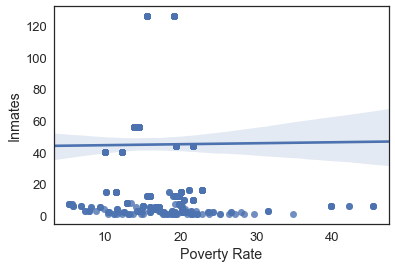

In [30]:
sns.regplot(x="Poverty Rate", y="Inmates", data=counties)

In [32]:
np.corrcoef(x=counties["Poverty Rate"], y=counties["Inmates"])

array([[ 1.        ,  0.00732972],
       [ 0.00732972,  1.        ]])

In [44]:
counties_3 = counties[counties.Inmates > 2]

In [45]:
np.corrcoef(x=counties_3["Poverty Rate"], y=counties_3["Inmates"])

array([[ 1.        ,  0.04892873],
       [ 0.04892873,  1.        ]])

In [49]:
counties_25 = counties[counties.Inmates > 9]
np.corrcoef(x=counties_10["Poverty Rate"], y=counties_10["Inmates"])


array([[ 1.        ,  0.48966874],
       [ 0.48966874,  1.        ]])

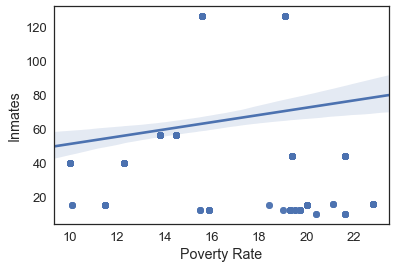

In [55]:
sns.regplot(x="Poverty Rate", y="Inmates", data=counties_10)

In [53]:
x = counties_10['Poverty Rate']
y = counties_10['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [54]:
print (slope, intercept, r_value, p_value, std_err)

2.1365622722 29.6298051643 0.158381810314 0.00265375859605 0.70594143739
